In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal



In [2]:
# import the cleaned data
benin_df = pd.read_csv("../data/benin_clean.csv")
sierraleone_df = pd.read_csv("../data/sierraleone_clean.csv")
togo_df = pd.read_csv("../data/togo_clean.csv")

# Add country labels
benin_df['Country'] = 'Benin'
sierraleone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Concatenate the dataframes
combined_df = pd.concat([benin_df, sierraleone_df, togo_df], ignore_index=True)


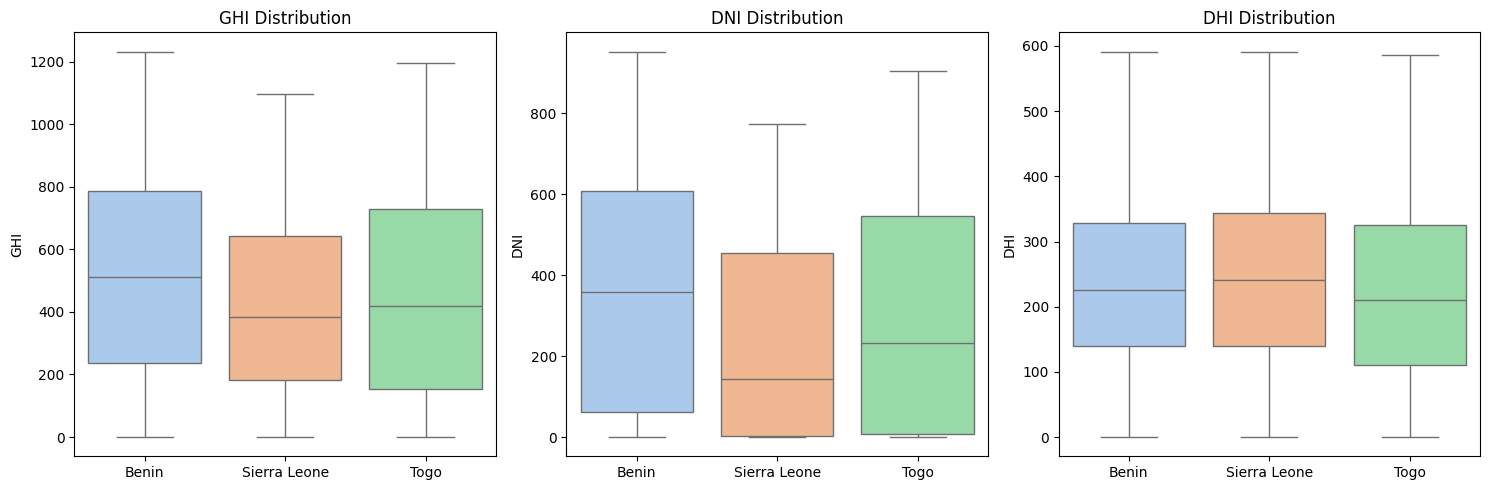

In [3]:
# Boxplot for GHI, DNI, and DHI
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Country', y=metric, data=combined_df, palette='pastel', hue=combined_df['Country'])
    plt.title(f'{metric} Distribution')
    plt.xlabel('')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()


In [4]:
# summary statistics for each country
summary_benin = benin_df[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary_sierraleone = sierraleone_df[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary_togo = togo_df[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)

# Combine summaries into a single DataFrame for better comparision
summary_combined = pd.concat({
    'Benin': summary_benin,
    'Sierra Leone': summary_sierraleone,
    'Togo': summary_togo
}, axis=1)

# display the summary statistics
print("Summary Statistics for GHI, DNI, and DHI:")
summary_combined


Summary Statistics for GHI, DNI, and DHI:


Benin                 Sierra Leone                    Togo          \
           GHI     DNI     DHI          GHI     DNI     DHI     GHI     DNI   
mean    508.39  358.81  241.52       419.71  235.84  246.10  446.10  293.34   
median  510.60  359.30  225.20       383.10  143.50  240.80  418.10  231.60   
std     304.16  280.16  136.28       276.79  245.43  136.34  316.09  281.02   

                
           DHI  
mean    223.55  
median  209.60  
std     144.16

In [5]:
# Extract GHI values for each country
ghi_benin = benin_df['GHI']
ghi_sierraleone = sierraleone_df['GHI']
ghi_togo = togo_df['GHI']

# One-Way ANOVA Test
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)

print(f"ANOVA p-value: {anova_p:.5f}")
if anova_p < 0.05:
    print("Significant differences in GHI between countries (p < 0.05)")
else:
    print("No significant differences in GHI (p >= 0.05)")


ANOVA p-value: 0.00000
Significant differences in GHI between countries (p < 0.05)


In [6]:
# kruskal-wallis test
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)

print(f"Kruskal-Wallis p-value: {kruskal_p:.5f}")
if kruskal_p < 0.05:
    print("Significant differences in GHI between countries (p < 0.05)")
else:
    print("No significant differences in GHI (p >= 0.05)")


Kruskal-Wallis p-value: 0.00000
Significant differences in GHI between countries (p < 0.05)


### Key Observations

- **Benin** has the **highest median GHI (510.60)** and **highest mean DNI (358.81)**, indicating strong and consistent solar irradiance, making it potentially ideal for solar energy projects.
- **Sierra Leone** shows the **lowest median DNI (143.50)** among the three, suggesting lower levels of direct sunlight and potentially more cloud cover or atmospheric diffusion, whiich actually can be confirmed by its slightly **higher median DHI (246.10)** than the three.
- **Togo** presents **moderate GHI and DNI values**, but with the **highest variability in GHI (std = 316.09)** and **DNI (std = 281.02)**, indicating more fluctuation in solar conditions over time.


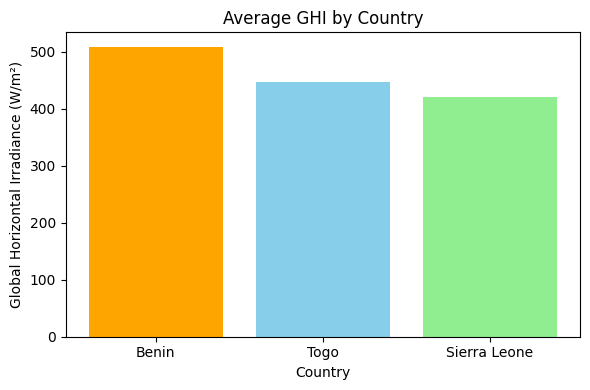

In [7]:
# Calculate average GHI for each country
avg_ghi = {
    "Benin": summary_benin["GHI"]["mean"],
    "Sierra Leone": summary_sierraleone["GHI"]["mean"],
    "Togo": summary_togo["GHI"]["mean"]
}

# Sort countries by average GHI
sorted_avg_ghi = dict(sorted(avg_ghi.items(), key=lambda item: item[1], reverse=True))

# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(sorted_avg_ghi.keys(), sorted_avg_ghi.values(), color=["orange", "skyblue", "lightgreen"])
plt.title("Average GHI by Country")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()